### API = Application Programming Interface
#### Limitations of webscraping
1. Some websites eg. amazon india do not allow web scraping

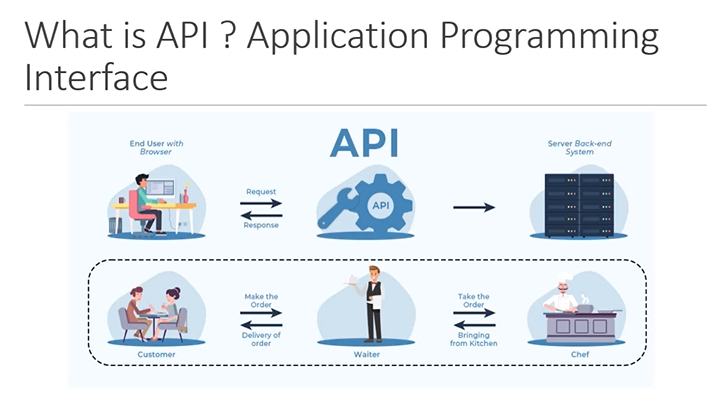

In [14]:
# Connection is through API - we send the request through API to the server and we get response back

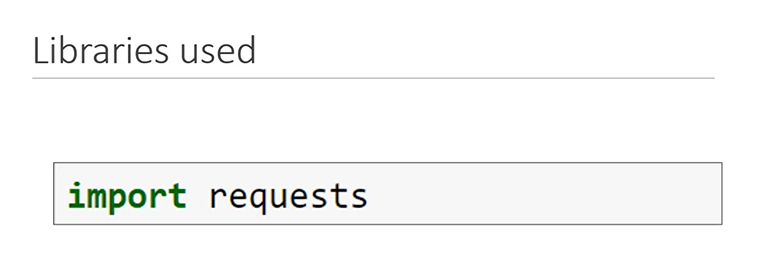

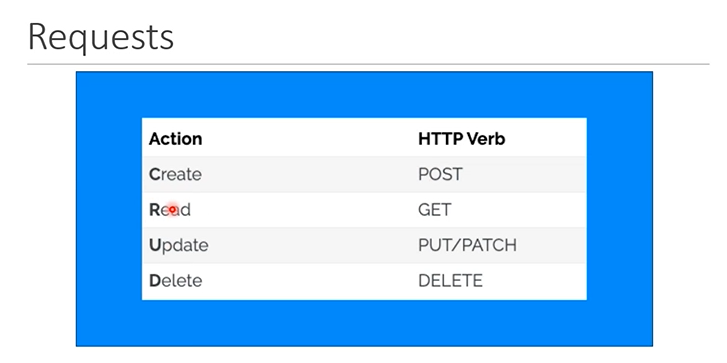
Get requests we will use more often

### To Collect Data on Stock Market - StockMarketAPI 

### For StockMarketAPI we need Alpha Vantage API- [https://rapidapi.com/alphavantage/api/alpha-vantage]

In [15]:
from warnings import filterwarnings
filterwarnings("ignore")

In [16]:
# Just like passwords we have API key so it need to be secure

In [17]:
# To create a dot file - .env to store secret api keys

In [18]:
# This file doesn't get commited to github file as it comes under gitignore

In [19]:
%pip install python-dotenv 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# With this we can get access to keys in env stored


### Read the API key

In [21]:
from dotenv import load_dotenv
load_dotenv()

True

### if above code is showing true then api key is loaded

In [22]:
import os
api_key = os.getenv("API_KEY")

In [23]:
# WE QUOTE IT LIKE THAT SO IT IS SECURE AND NOT USE BY SOMEBODY ELSE

In [24]:
# WE GET 5 Requests per minute - in this plan for business if we want we can upgrade it

### API Key is loaded

### SYMBOL SEARCH

In [27]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json() # COPY CODE FROM RAPID-API and paste here 

In [28]:
data

{'bestMatches': [{'1. symbol': 'SBIN.BSE',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBKFF',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SID.FRK',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBID.LON',
   '2. name': 'State Bank of India GDR',
   '3. type': 'Equity',
   '4. region': 'United Kingdom',
   '5. marketOpen': '08:00',
   '6. marketClose': '16:30',
   '7. timez

In [29]:
type(data)

dict

In [30]:
data["bestMatches"]

[{'1. symbol': 'SBIN.BSE',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBKFF',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'United States',
  '5. marketOpen': '09:30',
  '6. marketClose': '16:00',
  '7. timezone': 'UTC-04',
  '8. currency': 'USD',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SID.FRK',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'Frankfurt',
  '5. marketOpen': '08:00',
  '6. marketClose': '20:00',
  '7. timezone': 'UTC+02',
  '8. currency': 'EUR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBID.LON',
  '2. name': 'State Bank of India GDR',
  '3. type': 'Equity',
  '4. region': 'United Kingdom',
  '5. marketOpen': '08:00',
  '6. marketClose': '16:30',
  '7. timezone': 'UTC+01',
  '8. currency': 'USD',
  '9. mat

### Extracting only required details 
### Store name, region, currency for each type

In [32]:
d = {}

for i in data["bestMatches"]:
    symbol = i["1. symbol"]
    d[symbol] = [i["2. name"], i["4. region"], i["8. currency"]]

In [33]:
d

{'SBIN.BSE': ['State Bank of India', 'India/Bombay', 'INR'],
 'SBKFF': ['State Bank of India', 'United States', 'USD'],
 'SID.FRK': ['State Bank of India', 'Frankfurt', 'EUR'],
 'SBID.LON': ['State Bank of India GDR', 'United Kingdom', 'USD']}

In [34]:
# for everything we have different endpoints